# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import joblib

from google.colab import files

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
# Tampilkan 5 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [3]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [4]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

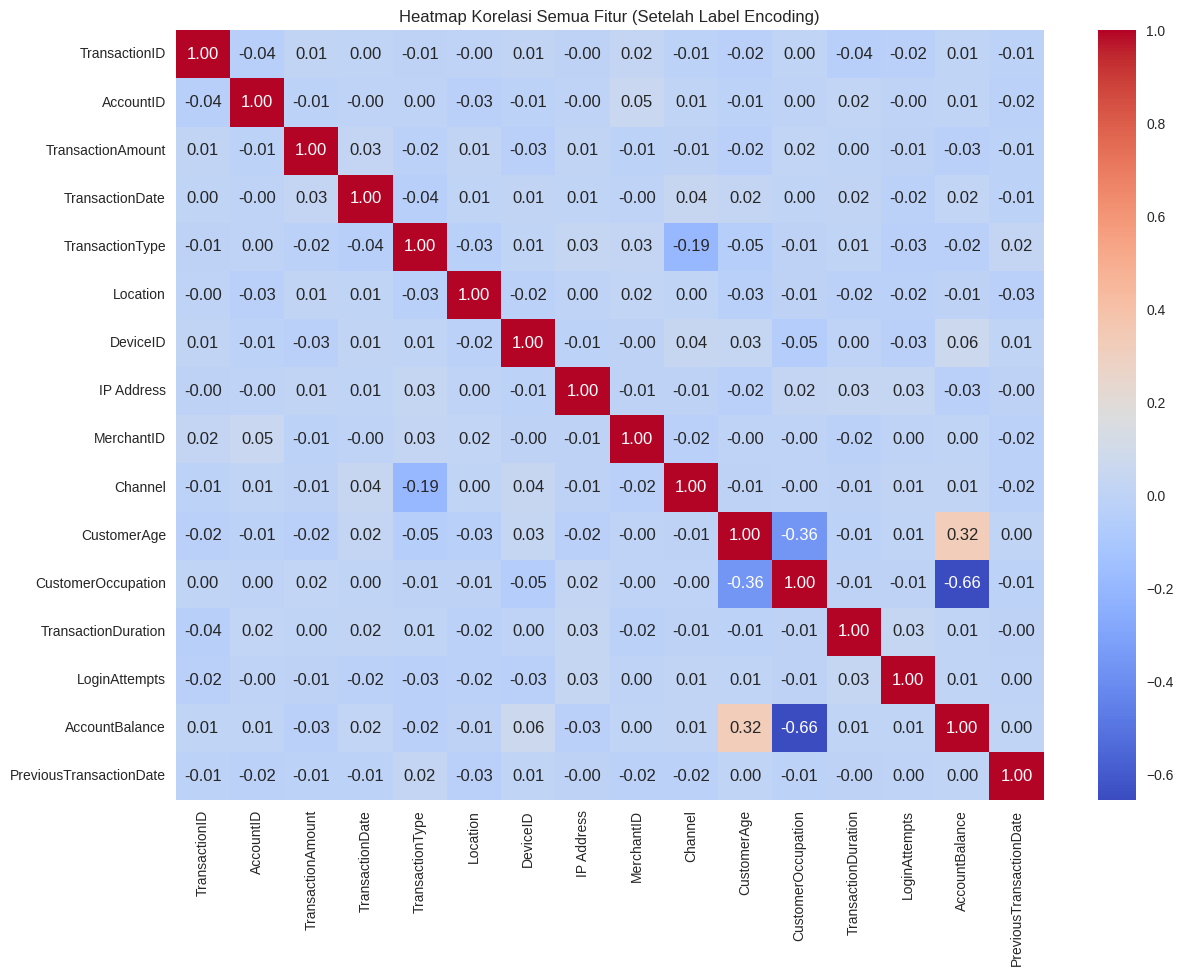

In [5]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Salin dataframe agar data mentah tetap aman
df_encode_for_heatmap = df.copy()

# Cari kolom-kolom non-numerik
non_numeric_columns = df_encode_for_heatmap.select_dtypes(include=['object']).columns

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encode semua kolom non-numerik
for column in non_numeric_columns:
    try:
      df_encode_for_heatmap[column] = le.fit_transform(df_encode_for_heatmap[column].astype(str))
    except Exception as e:
      print(f"Kolom {col} gagal di-encode: {e}")

plt.figure(figsize=(14,10))
sns.heatmap(df_encode_for_heatmap.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Semua Fitur (Setelah Label Encoding)")
plt.show()

/tmp/ipython-input-6-298628069.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionAmount_Binned', data=df_binned, order=labels, palette='viridis')


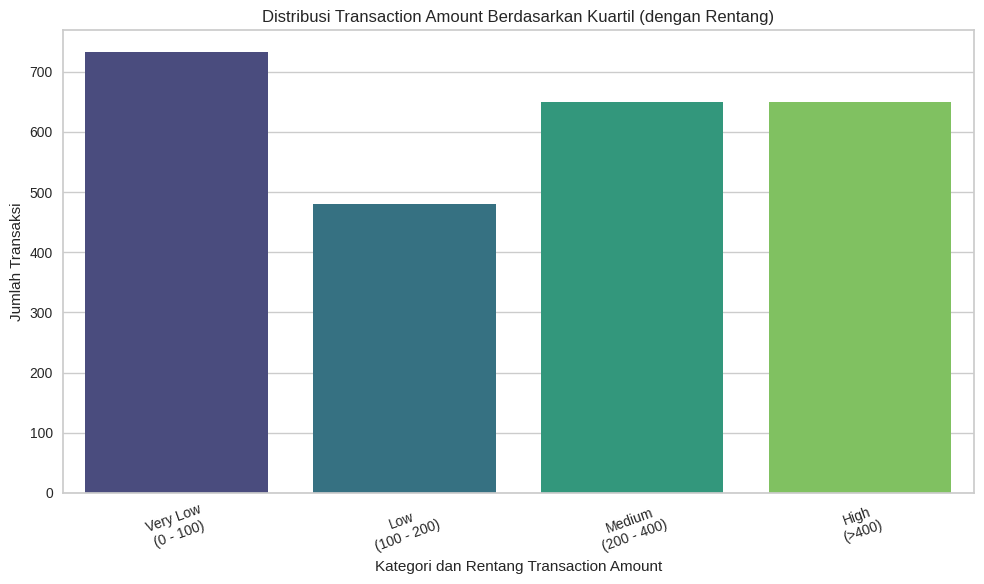

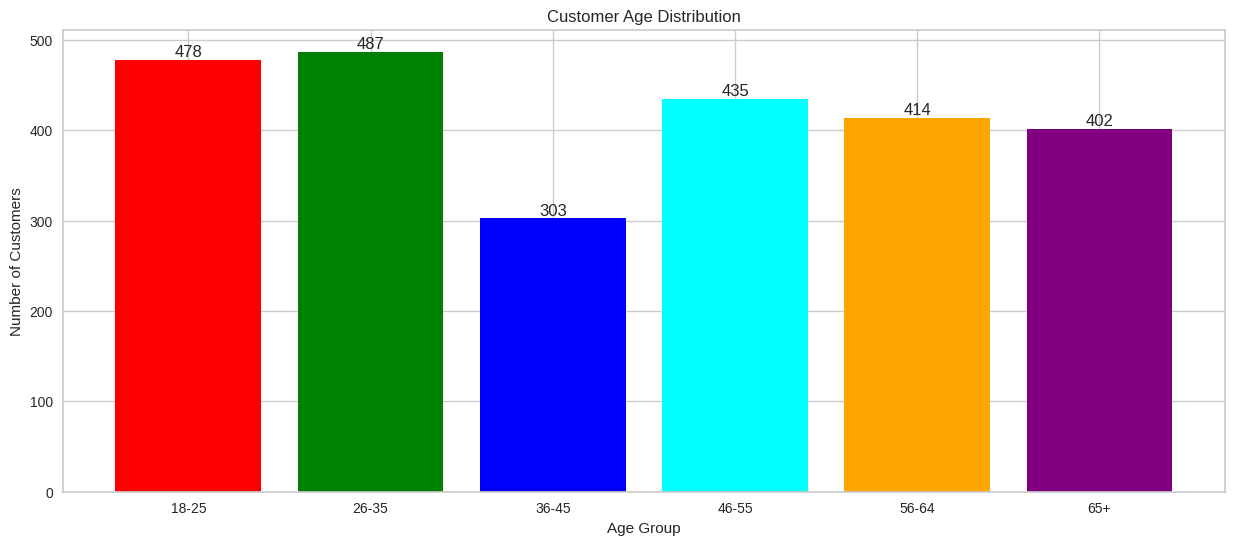

/tmp/ipython-input-6-298628069.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_binned, x='TransactionDuration_Binned', palette='pastel')


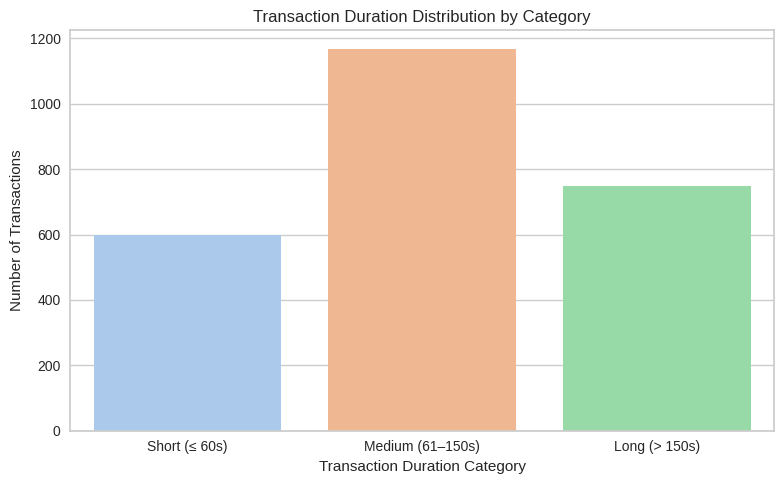

/tmp/ipython-input-6-298628069.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_binned, x='LoginAttempts', palette='Set2')


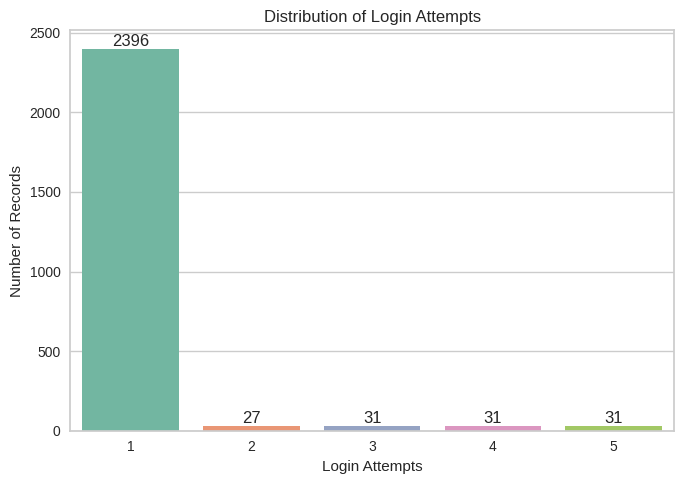

/tmp/ipython-input-6-298628069.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AccountBalance_Binned', data=df_binned, order=labels, palette='viridis')


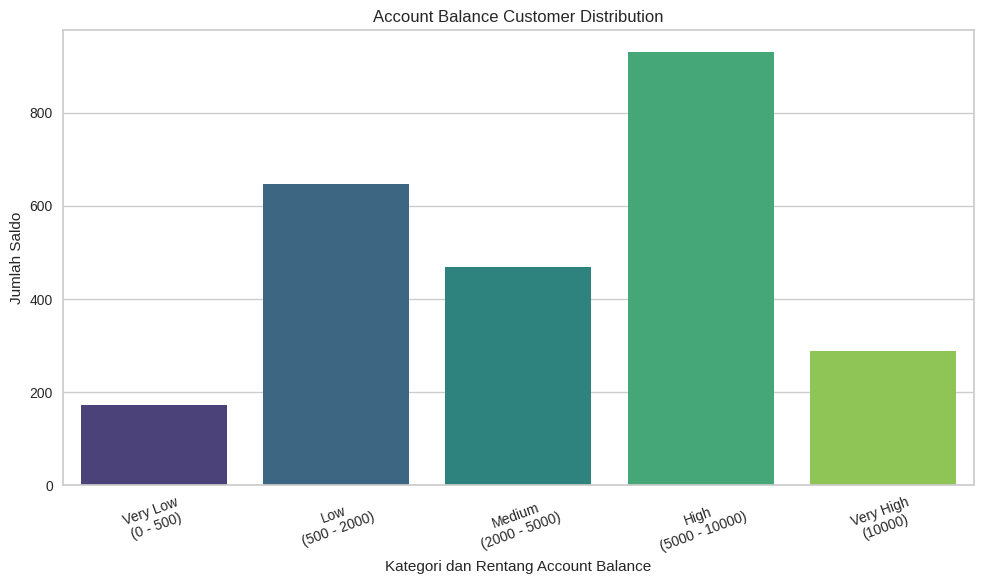

In [6]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
# Transaction Amount
df_binned = df.copy()
bins = [0, 100, 200, 400, df['TransactionAmount'].max()]
labels = [
    f'Very Low\n(0 - 100)',
    f'Low\n(100 - 200)',
    f'Medium\n(200 - 400)',
    f'High\n(>400)'
    ]
df_binned['TransactionAmount_Binned'] = pd.cut(df_binned['TransactionAmount'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(x='TransactionAmount_Binned', data=df_binned, order=labels, palette='viridis')

plt.title('Distribusi Transaction Amount Berdasarkan Kuartil (dengan Rentang)')
plt.xlabel('Kategori dan Rentang Transaction Amount')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Customer Age
age18_25 = df_binned.CustomerAge[(df_binned.CustomerAge >= 18) & (df_binned.CustomerAge <= 25)]
age26_35 = df_binned.CustomerAge[(df_binned.CustomerAge >= 26) & (df_binned.CustomerAge <= 35)]
age36_45 = df_binned.CustomerAge[(df_binned.CustomerAge >= 36) & (df_binned.CustomerAge <= 45)]
age46_55 = df_binned.CustomerAge[(df_binned.CustomerAge >= 46) & (df_binned.CustomerAge <= 55)]
age56_64 = df_binned.CustomerAge[(df_binned.CustomerAge >= 56) & (df_binned.CustomerAge <= 64)]
age65_above = df_binned.CustomerAge[df_binned.CustomerAge >= 65]

x = ["18-25", "26-35", "36-45", "46-55", "56-64", "65+"]
y = [
    len(age18_25.values),
    len(age26_35.values),
    len(age36_45.values),
    len(age46_55.values),
    len(age56_64.values),
    len(age65_above.values)
    ]

plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'orange', 'purple'])
plt.title("Customer Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
plt.show()

# Transaction Duration
bins = [0, 60, 150, 300]  # 1 menit, 2.5 menit, 5 menit
labels = ['Short (≤ 60s)', 'Medium (61–150s)', 'Long (> 150s)']
df_binned['TransactionDuration_Binned'] = pd.cut(df_binned['TransactionDuration'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
sns.countplot(data=df_binned, x='TransactionDuration_Binned', palette='pastel')

plt.title('Transaction Duration Distribution by Category')
plt.xlabel('Transaction Duration Category')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

# Login attempts
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df_binned, x='LoginAttempts', palette='Set2')

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title('Distribution of Login Attempts')
plt.xlabel('Login Attempts')
plt.ylabel('Number of Records')
plt.xticks([0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

# Account balance
bins = [0, 500, 2000, 5000, 10000, df_binned['AccountBalance'].max()]
labels = [
    f'Very Low\n(0 - 500)',
    f'Low\n(500 - 2000)',
    f'Medium\n(2000 - 5000)',
    f'High\n(5000 - 10000)',
    f'Very High\n(10000)'
    ]
df_binned['AccountBalance_Binned'] = pd.cut(df_binned['AccountBalance'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(x='AccountBalance_Binned', data=df_binned, order=labels, palette='viridis')

plt.title('Account Balance Customer Distribution')
plt.xlabel('Kategori dan Rentang Account Balance')
plt.ylabel('Jumlah Saldo')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [7]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [8]:
# Mengecek dataset menggunakan isnull().sum()
print(df.isnull().sum())

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [9]:
# Mengecek dataset menggunakan duplicated().sum()
print(df.duplicated().sum())

21


In [10]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

df_scaled = df.copy()

numerical_columns = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge', 'LoginAttempts']

scaler = MinMaxScaler()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

df_scaled[numerical_columns].head()

,TransactionAmount,TransactionDuration,AccountBalance,CustomerAge,LoginAttempts
0,0.007207,0.244828,0.336832,0.838710,0.0
1,0.195940,0.451724,0.918055,0.806452,0.0
2,0.065680,0.158621,0.068637,0.016129,0.0
3,0.096016,0.051724,0.569198,0.129032,0.0
4,0.006874,0.648276,0.492591,NaN,0.0


In [11]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df_scaled.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate'], axis=1, inplace=True)

In [12]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

df_encoded = df_scaled

non_numeric_columns = df_encoded.select_dtypes(include=['object']).columns

le = LabelEncoder()

for column in non_numeric_columns:
  try:
    df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
  except Exception as e:
    print(f"Kolom {col} gagal di-encode: {e}")

df_encoded.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591


In [13]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_encoded.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [14]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Sebelum dropna
print("Jumlah baris sebelum dropna:", len(df_encoded))

# Setelah dropna
df_encoded = df_encoded.dropna()
print("Jumlah baris setelah dropna:", len(df_encoded))

Jumlah baris sebelum dropna: 2537
Jumlah baris setelah dropna: 2420


In [15]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_encoded.drop_duplicates()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
5,0.047888,1,28,0,0.000000,3,0.558621,0.0,0.045738
...,...,...,...,...,...,...,...,...,...
2509,0.014785,1,36,1,0.612903,2,0.468966,0.0,0.220590
2510,0.096782,1,10,2,0.080645,3,0.031034,0.0,0.112636
2511,0.126545,0,17,2,0.096774,3,0.286207,0.0,0.002017
2523,0.006212,1,27,1,0.935484,2,0.231034,0.0,0.323188


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [16]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [17]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [18]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_encoded.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000
mean,0.154880,0.789669,21.417355,1.011983,0.430079,1.532645,0.377129,0.029752,0.335118
std,0.151731,0.436994,12.415909,0.831046,0.288086,1.152746,0.242653,0.146416,0.262221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042538,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093194
50%,0.110926,1.000000,21.500000,1.000000,0.435484,2.000000,0.351724,0.000000,0.307258
75%,0.214307,1.000000,32.000000,2.000000,0.661290,3.000000,0.521552,0.000000,0.507024
max,1.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000


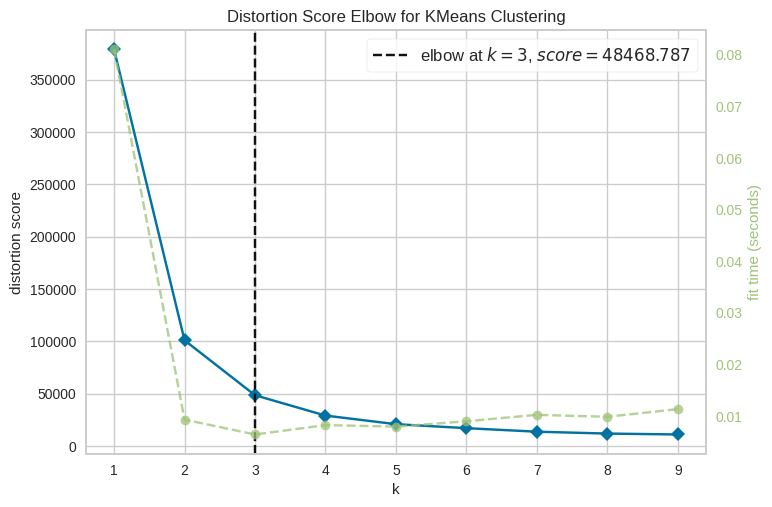

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df_encoded)
visualizer.show()

In [20]:
# Menggunakan algoritma K-Means Clustering
selected_features = ['TransactionAmount', 'CustomerAge', 'AccountBalance']

kmeans = KMeans(n_clusters=3, random_state=0)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded[selected_features])

df_original = df.copy()
drop_columns = ['TransactionID',
                'AccountID',
                'TransactionDate',
                'TransactionType',
                'Location',
                'DeviceID',
                'IP Address',
                'MerchantID',
                'Channel',
                'CustomerOccupation',
                'PreviousTransactionDate',
                'TransactionDuration',
                'LoginAttempts']
df_original = df_original.drop(columns=drop_columns)
df_cleaned = df_original.dropna().drop_duplicates()
df_cleaned['Cluster'] = df_encoded['Cluster']
df_cleaned.groupby('Cluster').mean()

/tmp/ipython-input-20-2798205743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Cluster'] = kmeans.fit_predict(df_encoded[selected_features])


,TransactionAmount,CustomerAge,AccountBalance
Cluster,,,
0.0,307.669429,26.095990,1725.473183
1.0,286.981662,44.392550,9855.762006
2.0,296.927002,62.232265,4454.584359


Jalankan cell code ini untuk menyimpan model kamu.

In [21]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")
files.download('model_clustering.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [22]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(df_encoded[selected_features], df_encoded['Cluster'])

print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.4084


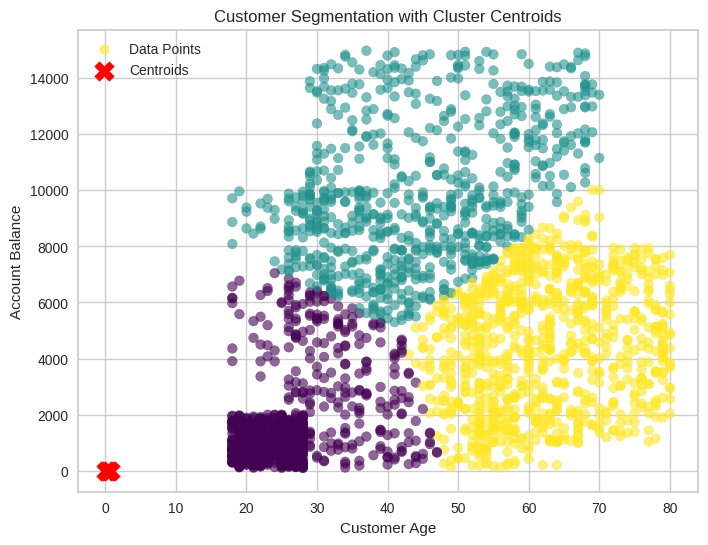

In [23]:
# Membuat visualisasi hasil clustering
x = df_cleaned['CustomerAge']
y = df_cleaned['AccountBalance']
labels = df_cleaned['Cluster']

plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=labels, cmap='viridis', alpha=0.6, label='Data Points')

centroids = kmeans.cluster_centers_

centroid_x = centroids[:, selected_features.index('CustomerAge')]
centroid_y = centroids[:, selected_features.index('AccountBalance')]

plt.scatter(centroid_x, centroid_y, marker='X', s=200, c='red', label='Centroids')

plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.title('Customer Segmentation with Cluster Centroids')
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [24]:
# Membangun model menggunakan PCA.

In [25]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [26]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
df_cleaned.groupby('Cluster')[selected_features].agg(['min', 'mean', 'max'])
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

TransactionAmount                      CustomerAge                   \
                      min        mean      max         min       mean   max   
Cluster                                                                       
0.0                  0.26  307.669429  1762.28        18.0  26.095990  47.0   
1.0                  0.32  286.981662  1919.11        18.0  44.392550  70.0   
2.0                  0.84  296.927002  1830.00        43.0  62.232265  80.0   

        AccountBalance                         
                   min         mean       max  
Cluster                                        
0.0             101.25  1725.473183   7047.04  
1.0            5298.85  9855.762006  14977.99  
2.0             120.89  4454.584359  10017.11

In [27]:
df_encoded.groupby('Cluster')[selected_features].agg(['min', 'mean', 'max'])

TransactionAmount                     CustomerAge                      \
                      min      mean       max         min      mean       max   
Cluster                                                                         
0                0.000000  0.160047  0.918269    0.000000  0.130354  0.467742   
1                0.000031  0.149688  1.000000    0.000000  0.426790  0.838710   
2                0.000302  0.154171  0.953561    0.403226  0.713796  1.000000   

        AccountBalance                      
                   min      mean       max  
Cluster                                     
0             0.000000  0.108699  0.466889  
1             0.349378  0.655401  1.000000  
2             0.001320  0.292325  0.666534

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Nasabah Berusia Muda dengan Jumlah Saldo Paling Sedikit)**:
  - **Rata-rata (mean) Usia Pelanggan:** 0.130 (26)
  - **Rata-rata (mean) Jumlah Transaksi:** 0.160 (307,66)
  - **Rata-rata (mean) Jumlah Saldo:** 0.108 (1725,47)
  - **Analisis:** Cluster ini merupakan kelompok usia muda dengan jumlah saldo tidak begitu tinggi. Rata-rata transaksi hampir sama di antara 3 kluster. Pendekatan yang tepat untuk usia ini mungkin adalah tabungan pendidikan/tabungan pensiun.

2. **Cluster 2: (Nasabah Berusia Produktif dengan Jumlah Saldo Tertinggi)**:
  - **Rata-rata (mean) Usia Pelanggan:** 0.426 (44)
  - **Rata-rata (mean) Jumlah Transaksi:** 0.149 (286,98)
  - **Rata-rata (mean) Jumlah Saldo:** 0.655 (9855,76)
  - **Analisis:** Cluster ini merupakan kelompok usia produktif (matang) dengan jumlah saldo tertinggi. Meski begitu, jumlah transaksi mereka rata-rata sama dengan kelompok lainnya. Kelompok ini dapat ditawarkan dalam berbagai produk/jasa yang dapat dikembangkan bank seperti investasi saham.

3. **Cluster 3: (Nasabah Pra-lansia & Lansia dengan Jumlah Saldo Menengah)**:
  - **Rata-rata (mean) Usia Pelanggan:** 0.713 (62)
  - **Rata-rata (mean) Jumlah Transaksi:** 0.154 (296,92)
  - **Rata-rata (mean) Jumlah Saldo:** 0.292 (4454,58)
  - **Analisis:** Cluster ini memiliki nasabah dengan usia lanjut dan jumlah saldo menengah di antara kluster yang lain. Program yang dapat ditawarkan pada kluster ini adalah tabungan pensiun atau program asuransi/tabungan layanan kesehatan.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_encoded.rename(columns={'Cluster': 'Target'}, inplace=True)

/tmp/ipython-input-28-396018669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.rename(columns={'Cluster': 'Target'}, inplace=True)


In [29]:
# Simpan Data
df_encoded.to_csv('data_clustering.csv', index=False)
files.download('data_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [31]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [32]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [33]:
# Simpan Data